# Exploratory Data Analysis (EDA)

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments.  

EDA is different from initial data analysis (IDA), which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA encompasses IDA.

This notebook show different technics for explored and visualized a dataset.

# Import Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as mno
import matplotlib.pyplot as plt
import tensorflow_data_validation as tfdv
from witwidget.notebook.visualization import WitConfigBuilder
from witwidget.notebook.visualization import WitWidget

# EDA with the library `pandas`

In [15]:
# load the data from a csv in a DataFrame pandas
df = pd.read_csv('./data/paris-real-estate.csv', sep=';')

In [6]:
# Show the fisrt 2 row of the dataset
df.head(2)

,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,annee,ville,code_grand_quartier,geo_shape,geo_point_2d
0,13,75,Amérique,4,1946-1970,non meublé,14.6,17.52,10.22,2020,PARIS,7511975,"{""type"": ""Polygon"", ""coordinates"": [[[2.409402...","48.8816381673,2.39544016662"
1,13,74,Pont-de-Flandre,4,Apres 1990,meublé,18.5,22.20,12.95,2020,PARIS,7511974,"{""type"": ""Polygon"", ""coordinates"": [[[2.384878...","48.8955557746,2.38477722927"


In [4]:
# Show the shape of the dataset (nb of row, nb of column)
df.shape

(2560, 14)

In [12]:
# quick synthesis
print('Number of row       : ', df.shape[0])
print()
print('Number of columns   : ', df.shape[1])
print()
print('Features            : \n', df.columns.tolist())
print()
print('Missing values      : \n', df.isnull().sum())
print()
print('Unique values       : \n', df.nunique())
print()
print('Total missing values:', df.isnull().values.sum())

Number of row       :  2560

Number of columns   :  14

Features            : 
 ['id_zone', 'id_quartier', 'nom_quartier', 'piece', 'epoque', 'meuble_txt', 'ref', 'max', 'min', 'annee', 'ville', 'code_grand_quartier', 'geo_shape', 'geo_point_2d']

Missing values      : 
 id_zone                0
id_quartier            0
nom_quartier           0
piece                  0
epoque                 0
meuble_txt             0
ref                    0
max                    0
min                    0
annee                  0
ville                  0
code_grand_quartier    0
geo_shape              0
geo_point_2d           0
dtype: int64

Unique values       : 
 id_zone                 14
id_quartier             80
nom_quartier            80
piece                    4
epoque                   4
meuble_txt               2
ref                    152
max                    152
min                    152
annee                    1
ville                    1
code_grand_quartier     80
geo_shape       

In [6]:
# More info on the specific unique values in a column
df['epoque'].unique().tolist()

['1946-1970', 'Apres 1990', '1971-1990', 'Avant 1946']

In [13]:
# Quick stats on your dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_zone,2560.0,6.662500e+00,4.225585,1.00,3.00,5.00,11.00,14.00
id_quartier,2560.0,4.050000e+01,23.096718,1.00,20.75,40.50,60.25,80.00
piece,2560.0,2.500000e+00,1.118252,1.00,1.75,2.50,3.25,4.00
ref,2560.0,2.572723e+01,4.181951,14.60,22.90,25.30,28.30,39.60
max,2560.0,3.087267e+01,5.018341,17.52,27.48,30.36,33.96,47.52
min,2560.0,1.800906e+01,2.927365,10.22,16.03,17.71,19.81,27.72
annee,2560.0,2.020000e+03,0.000000,2020.00,2020.00,2020.00,2020.00,2020.00
code_grand_quartier,2560.0,7.511090e+06,599.811459,7510101.00,7510595.75,7511090.50,7511585.25,7512080.00


In [15]:
# Quick info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_zone              2560 non-null   int64  
 1   id_quartier          2560 non-null   int64  
 2   nom_quartier         2560 non-null   object 
 3   piece                2560 non-null   int64  
 4   epoque               2560 non-null   object 
 5   meuble_txt           2560 non-null   object 
 6   ref                  2560 non-null   float64
 7   max                  2560 non-null   float64
 8   min                  2560 non-null   float64
 9   annee                2560 non-null   int64  
 10  ville                2560 non-null   object 
 11  code_grand_quartier  2560 non-null   int64  
 12  geo_shape            2560 non-null   object 
 13  geo_point_2d         2560 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 280.1+ KB


## Check the missing data with the library `mno`

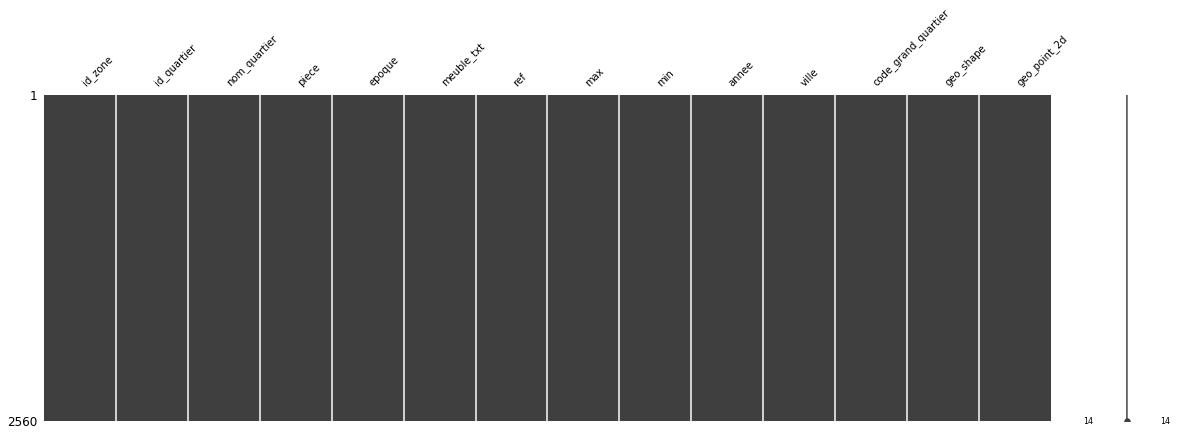

In [7]:
mno.matrix(df, figsize = (20, 6), fontsize=10)

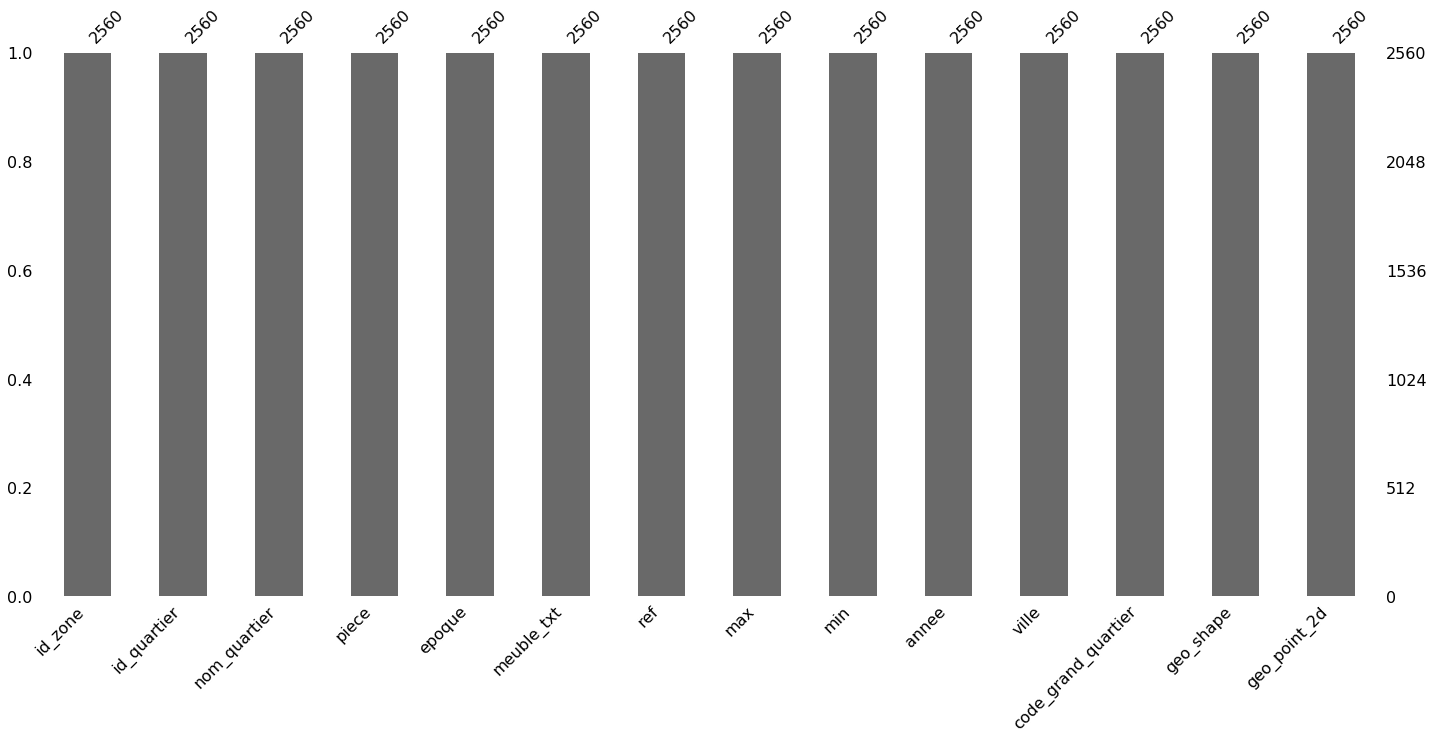

In [9]:
mno.bar(df)

## Visualize the data with library `seaborn`

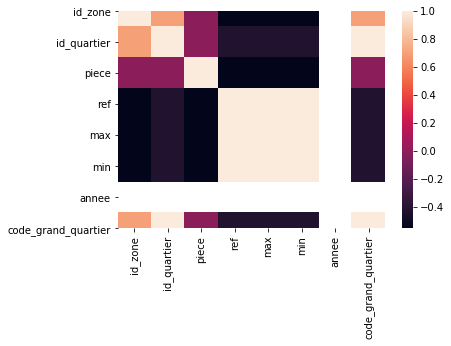

In [10]:
# Correlation matrix
sns.heatmap(df.corr())

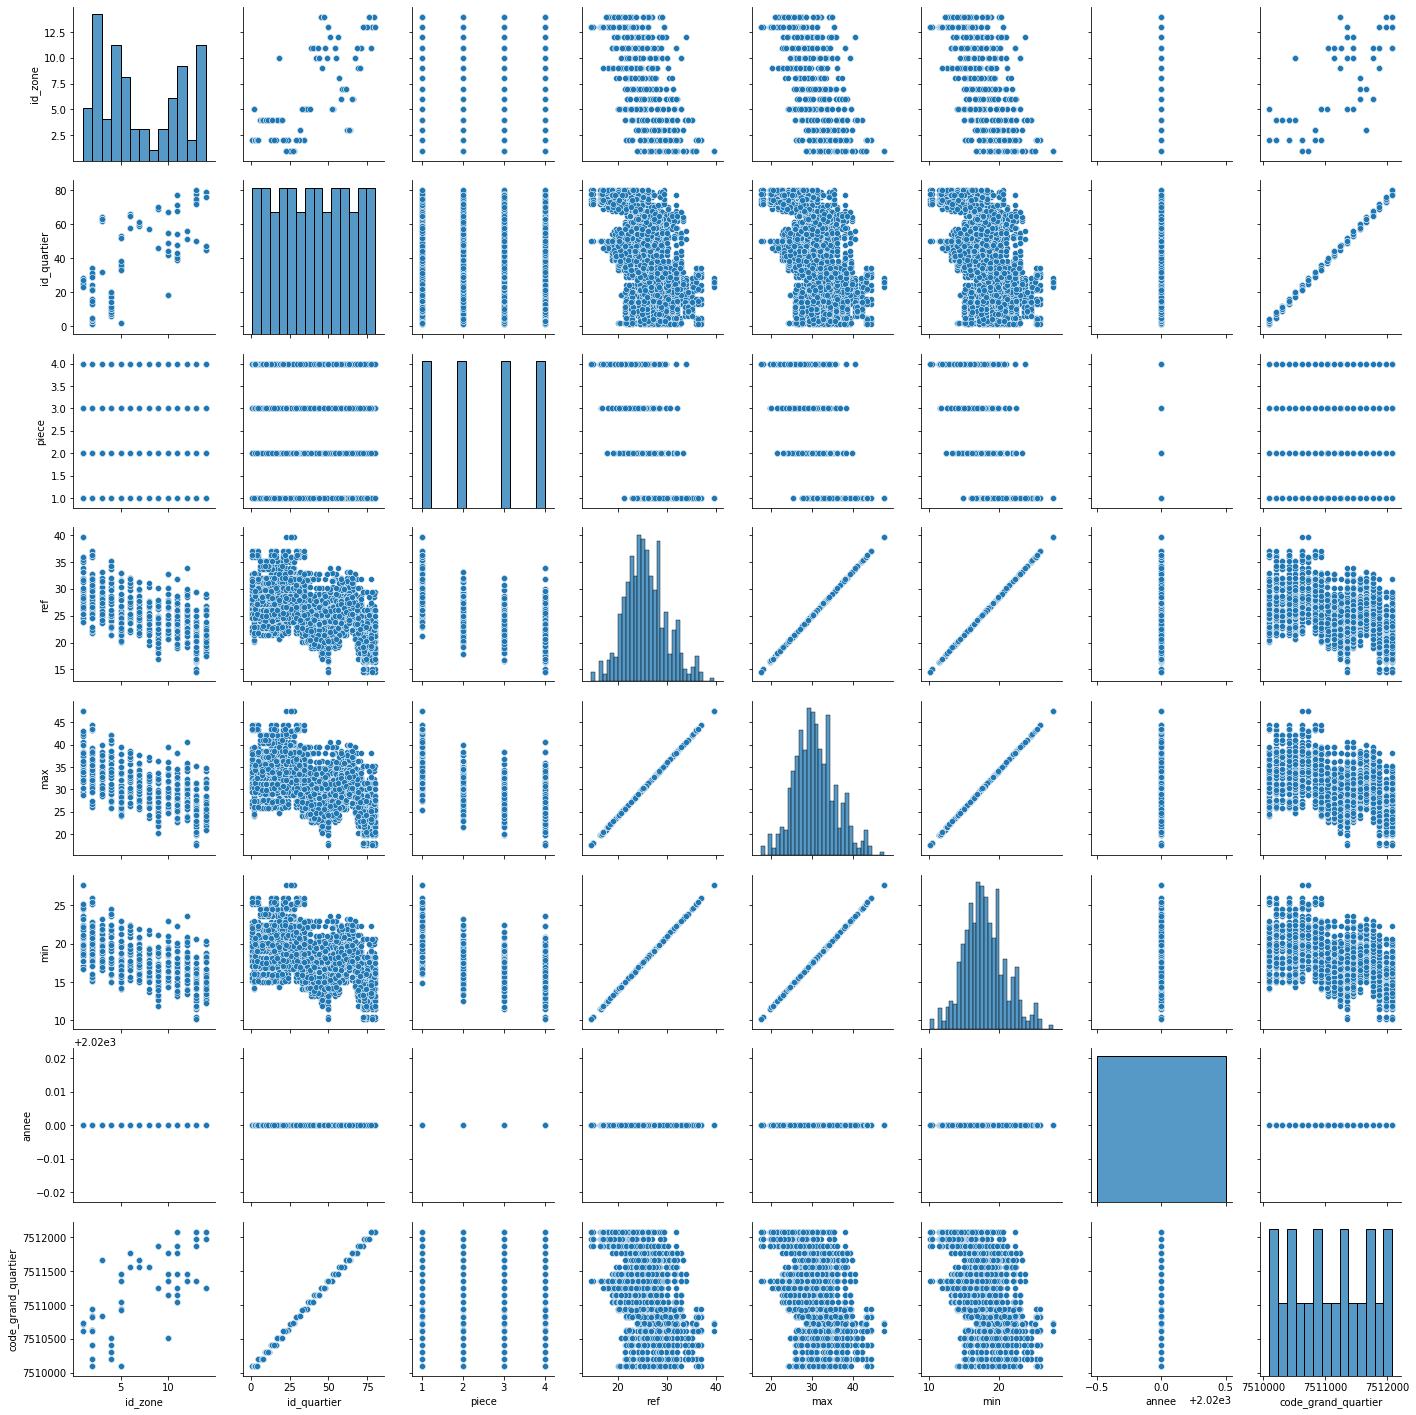

In [11]:
# Plot pairwise relationships in a dataset
sns.pairplot(df)

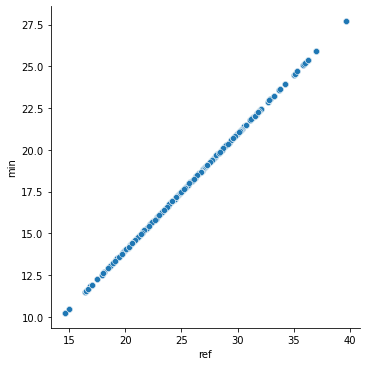

In [54]:
sns.relplot(x="ref", y="min", data=df)

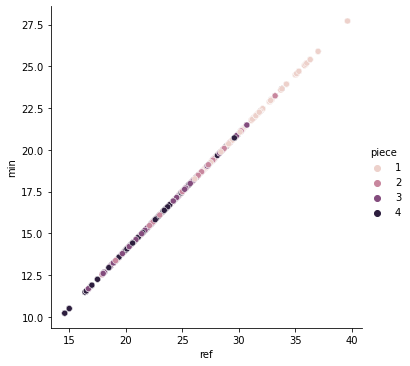

In [58]:
sns.relplot(x="ref", y="min", hue="piece", data=df);

<AxesSubplot:xlabel='ref', ylabel='min'>

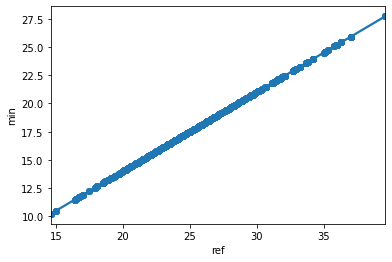

In [66]:
sns.regplot(x='ref', y='min', data=df)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ref', ylabel='Density'>

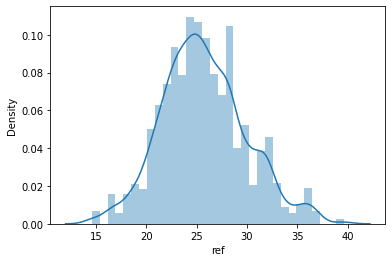

In [61]:
sns.distplot(df['ref'])

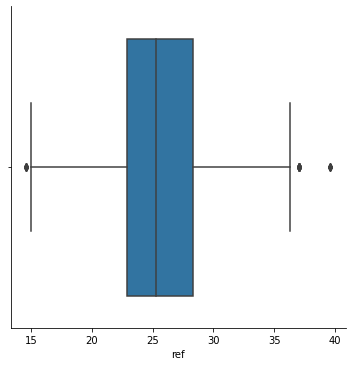

In [62]:
sns.catplot(x='ref', kind='box', data=df)

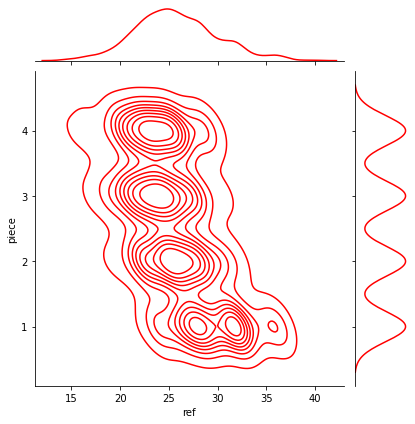

In [67]:
sns.jointplot(x='ref',y='piece',data=df,color='red',kind='kde');

<AxesSubplot:xlabel='epoque', ylabel='count'>

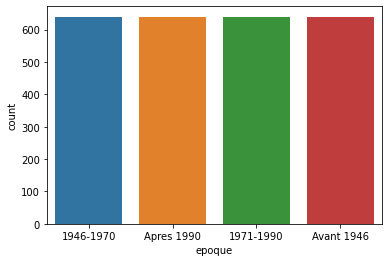

In [51]:
sns.countplot(x=df['epoque'])

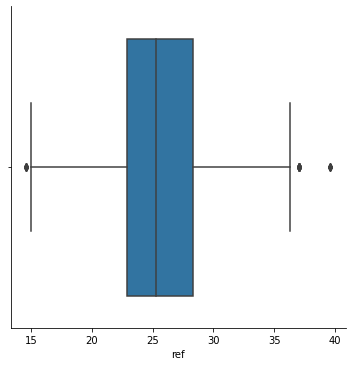

In [27]:
sns.catplot(x='ref', kind='box', data=df)

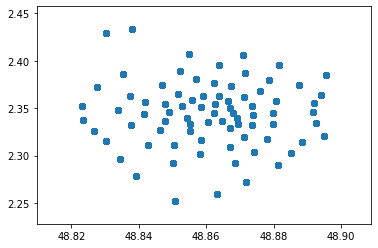

In [12]:
# Processed the geo point
# Create a column for the longitude and latitude
new_col = pd.DataFrame(df['geo_point_2d'].str.split(',',1).tolist(), columns = ['lat', 'lon'])

# Change the type to float
df['lat'] = new_col['lat'].astype(float)
df['lon'] = new_col['lon'].astype(float)

x = df['lat']
y = df['lon']

# Show I 
plt.scatter(x, y)
plt.show()

# EDA with the library `tensorflow`

In [13]:
# Générer les statistiques à partir d'un dataframe pandas
stats = tfdv.generate_statistics_from_dataframe(df)
# Visualisation des statistiques (Facets)
tfdv.visualize_statistics(stats)